<a href="https://colab.research.google.com/github/s-zhang-cs/Google-Colabs/blob/main/ANN_regression_codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Pytorch for deep learning with Python Bootcamp by Jose Portilla


In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('Data/NYCTaxiFares.csv')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [9]:
def haversine_distance(df, lat1, long1, lat2, long2):
  r = 6371

  phi1 = np.radians(df[lat1])
  phi2 = np.radians(df[lat2])

  delta_phi = np.radians(df[lat2]-df[lat1])
  delta_lambda = np.radians(df[long2]-df[long1])

  a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
  d = (r * c)

  return d

In [10]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [11]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [15]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [16]:
my_time = df['pickup_datetime'].values
my_time

array(['2010-04-19T08:17:56.000000000', '2010-04-17T15:43:53.000000000',
       '2010-04-17T11:23:26.000000000', ...,
       '2010-04-18T18:50:40.000000000', '2010-04-13T08:14:44.000000000',
       '2010-04-17T16:00:14.000000000'], dtype='datetime64[ns]')

In [17]:
df['EDTDate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [18]:
df['Hour'] = df['EDTDate'].dt.hour

In [19]:
df['AMorPM'] = np.where(df['Hour']<12, 'AM', 'PM')

In [20]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTDate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,AM
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,AM
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,AM
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,PM
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,PM


In [21]:
df['Weekday'] = df['EDTDate'].dt.strftime("%a")

In [22]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTDate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,AM,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,AM,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,AM,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,PM,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,PM,Fri


In [23]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTDate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [24]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_cols = ['fare_amount']

In [25]:
y_col = ['fare_amount']

In [26]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTDate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [27]:
for cat in cat_cols:
  df[cat] = df[cat].astype('category')

In [28]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTDate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [29]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [30]:
df['AMorPM'].head()

0    AM
1    AM
2    AM
3    PM
4    PM
Name: AMorPM, dtype: category
Categories (2, object): ['AM', 'PM']

In [31]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [32]:
df['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
         ..
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [33]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [34]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [35]:
cats = np.stack([hr, ampm, wkdy], axis=1)

In [36]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [37]:
# cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [38]:
cats = torch.tensor(cats, dtype=torch.int64)

In [39]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTDate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [40]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)

In [41]:
conts = torch.tensor(conts, dtype=torch.float)

In [42]:
conts

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        ...,
        [ 40.7498, -73.9886,  40.7078, -74.0115,   3.0000,   5.0525],
        [ 40.7245, -74.0044,  40.7308, -73.9927,   1.0000,   1.2089],
        [ 40.7719, -73.9554,  40.7630, -73.9676,   3.0000,   1.4274]])

In [43]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1, 1)

In [44]:
cats.shape

torch.Size([120000, 3])

In [45]:
conts.shape

torch.Size([120000, 6])

In [46]:
y.shape

torch.Size([120000, 1])

In [47]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [48]:
cat_szs

[24, 2, 7]

In [49]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [50]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [51]:
cat_2 = cats[:2]

In [52]:
cat_2

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [53]:
embedding = nn.Embedding(10,3)
embedding.weight

Parameter containing:
tensor([[-2.6542,  1.3924, -0.3799],
        [-0.3993,  0.5103, -1.3008],
        [ 0.5808, -0.7872, -0.1739],
        [-1.0582, -1.2198,  0.5251],
        [ 0.1906,  0.8094, -0.9816],
        [ 0.4984,  1.6036, -0.6111],
        [ 0.8891, -0.5045,  0.5877],
        [ 0.6351, -0.9906, -0.5747],
        [ 1.1543,  0.2788,  0.2805],
        [ 0.8326, -0.1241,  0.7111]], requires_grad=True)

In [54]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [55]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [57]:
selfembeds[0].weight

Parameter containing:
tensor([[-1.2853e+00,  1.4265e+00,  8.5343e-01, -8.3335e-01,  5.6279e-01,
          2.4873e-01,  1.4907e+00,  4.7928e-01,  1.1182e+00,  2.0344e+00,
          4.5403e-01,  9.7512e-01],
        [-2.3571e+00, -3.3004e-01, -2.4683e-01, -1.3172e-01,  1.0746e+00,
         -7.2638e-01, -2.4752e-01,  5.7543e-01,  3.0788e-01, -4.8172e-01,
         -2.1009e+00,  1.2159e+00],
        [-1.6211e-02, -1.6616e+00,  1.1507e-01, -1.2088e+00,  3.4410e-01,
          1.3245e+00, -2.2980e+00,  3.2554e-01,  1.2430e+00, -1.4812e+00,
         -1.3166e+00,  1.1619e+00],
        [-2.2172e-01,  7.8781e-01,  3.3501e-01,  3.0054e-01, -1.7011e+00,
         -9.0528e-01, -2.0816e+00, -4.4241e-02,  2.6416e-01,  1.2280e+00,
          7.9030e-01, -1.7617e-01],
        [-1.3042e+00, -9.3309e-01, -1.1943e+00,  4.2845e-01,  5.9844e-01,
          1.7023e+00, -1.9374e+00,  3.1832e-01,  1.3518e-01, -1.1972e+00,
          1.7145e+00, -4.5281e-01],
        [-5.1640e-01,  8.2270e-01, -2.8797e-01,  4.0943e-0

In [58]:
selfembeds[0](torch.tensor([0]))

tensor([[-1.2853,  1.4265,  0.8534, -0.8333,  0.5628,  0.2487,  1.4907,  0.4793,
          1.1182,  2.0344,  0.4540,  0.9751]], grad_fn=<EmbeddingBackward0>)

In [59]:
selfembeds[0](torch.tensor([0,1]))

tensor([[-1.2853,  1.4265,  0.8534, -0.8333,  0.5628,  0.2487,  1.4907,  0.4793,
          1.1182,  2.0344,  0.4540,  0.9751],
        [-2.3571, -0.3300, -0.2468, -0.1317,  1.0746, -0.7264, -0.2475,  0.5754,
          0.3079, -0.4817, -2.1009,  1.2159]], grad_fn=<EmbeddingBackward0>)

In [60]:
cat_2[:, 0] # first column of categorical data (hour)

tensor([ 4, 11])

In [61]:
cat_2[:, 1] # second col (am/pm)

tensor([0, 0])

In [62]:
cat_2[:, 2] # third col (weekday)

tensor([1, 2])

In [63]:
for i,e in enumerate(selfembeds):
  print("------------------------------------------")
  print("i: " + str(i))
  print(e)

------------------------------------------
i: 0
Embedding(24, 12)
------------------------------------------
i: 1
Embedding(2, 1)
------------------------------------------
i: 2
Embedding(7, 4)


In [64]:
embedding_2 = []

for i,e in enumerate(selfembeds):
  embedding_2.append(e(cat_2[:, i]))

In [65]:
embedding_2

[tensor([[-1.3042, -0.9331, -1.1943,  0.4284,  0.5984,  1.7023, -1.9374,  0.3183,
           0.1352, -1.1972,  1.7145, -0.4528],
         [-0.6743, -0.5079, -0.0865,  0.3577,  0.3882, -0.1418, -0.0199,  1.4057,
           1.0812, -1.1746, -0.6729,  1.1029]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.8575],
         [-0.8575]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.5119, -1.2238,  1.3648, -1.6104],
         [-0.3402, -0.4528,  1.2273, -0.3302]], grad_fn=<EmbeddingBackward0>)]

In [66]:
z = torch.cat(embedding_2, 1)
z

tensor([[-1.3042, -0.9331, -1.1943,  0.4284,  0.5984,  1.7023, -1.9374,  0.3183,
          0.1352, -1.1972,  1.7145, -0.4528, -0.8575, -1.5119, -1.2238,  1.3648,
         -1.6104],
        [-0.6743, -0.5079, -0.0865,  0.3577,  0.3882, -0.1418, -0.0199,  1.4057,
          1.0812, -1.1746, -0.6729,  1.1029, -0.8575, -0.3402, -0.4528,  1.2273,
         -0.3302]], grad_fn=<CatBackward0>)

In [67]:
selfembdrop = nn.Dropout(0.4)
z = selfembdrop(z)

In [68]:
z

tensor([[-0.0000, -1.5552, -0.0000,  0.7141,  0.0000,  0.0000, -0.0000,  0.5305,
          0.2253, -0.0000,  0.0000, -0.0000, -1.4292, -0.0000, -2.0396,  0.0000,
         -0.0000],
        [-1.1238, -0.0000, -0.0000,  0.0000,  0.6470, -0.0000, -0.0000,  2.3428,
          1.8021, -1.9577, -1.1215,  1.8382, -1.4292, -0.5670, -0.7546,  2.0456,
         -0.0000]], grad_fn=<MulBackward0>)

In [69]:
a = torch.rand(5,6)
print(a)
b = torch.rand(5,3)
print(b)
c = torch.cat((a,b), 1)
c

tensor([[0.7715, 0.2594, 0.4630, 0.3262, 0.7882, 0.6030],
        [0.7523, 0.6081, 0.0951, 0.3786, 0.7530, 0.0846],
        [0.7632, 0.6607, 0.0798, 0.0921, 0.3668, 0.8944],
        [0.4120, 0.9196, 0.8385, 0.5969, 0.7558, 0.9605],
        [0.0570, 0.8989, 0.3556, 0.9599, 0.0279, 0.1148]])
tensor([[0.2430, 0.1287, 0.9836],
        [0.0391, 0.3702, 0.8596],
        [0.0678, 0.6406, 0.7081],
        [0.0724, 0.7250, 0.1313],
        [0.8940, 0.3203, 0.3600]])


tensor([[0.7715, 0.2594, 0.4630, 0.3262, 0.7882, 0.6030, 0.2430, 0.1287, 0.9836],
        [0.7523, 0.6081, 0.0951, 0.3786, 0.7530, 0.0846, 0.0391, 0.3702, 0.8596],
        [0.7632, 0.6607, 0.0798, 0.0921, 0.3668, 0.8944, 0.0678, 0.6406, 0.7081],
        [0.4120, 0.9196, 0.8385, 0.5969, 0.7558, 0.9605, 0.0724, 0.7250, 0.1313],
        [0.0570, 0.8989, 0.3556, 0.9599, 0.0279, 0.1148, 0.8940, 0.3203, 0.3600]])

In [2]:
class TabularModel(nn.Module):
  def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):

    # layers = [200, 100, 50]

    super().__init__()
    self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
    self.emb_drop = nn.Dropout(p)
    self.bn_cont = nn.BatchNorm1d(n_cont)

    layerlist = []
    n_emb = sum([nf for ni,nf in emb_szs])
    n_in = n_emb + n_cont

    for i in layers:
      layerlist.append(nn.Linear(n_in, i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in = i

    layerlist.append(nn.Linear(layers[-1],out_sz))

    self.layers = nn.Sequential(*layerlist)

  def forward(self, x_cat, x_cont):
    embeddings = []
    for i,e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))
    x = torch.cat(embeddings, 1)
    x = self.emb_drop(x)
    x_cont = self.bn_cont(x_cont)
    x = torch.cat([x, x_cont], 1)
    x = self.layers(x)
    return x

In [3]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200, 100], p=0.4)

NameError: ignored

In [68]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [75]:
criterion = nn.MSELoss() # np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [71]:
batch_size = 60000
test_size = int(batch_size * 0.2)

In [72]:
#DATA SHUFFLED ALREADY
cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size:batch_size]
con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size:batch_size]

In [73]:
y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size:batch_size]

In [73]:
len(cat_train)

48000

In [78]:
len(cat_test)

12000

In [93]:
# TRAINING 
import time 
start_time = time.time()
epochs = 1000

losses = []

for i in range(epochs):
  i += 1
  y_pred = model(cat_train, con_train)
  loss = torch.sqrt(criterion(y_pred, y_train)) #RMSE
  losses.append(loss)

  if i%10 == 1:
    print(f'epoch: {i} loss is {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 1 loss is 3.3738696575164795
epoch: 11 loss is 3.3812549114227295
epoch: 21 loss is 3.364935874938965
epoch: 31 loss is 3.3663880825042725
epoch: 41 loss is 3.3550429344177246
epoch: 51 loss is 3.3261160850524902
epoch: 61 loss is 3.3257663249969482
epoch: 71 loss is 3.3184564113616943
epoch: 81 loss is 3.3081202507019043
epoch: 91 loss is 3.2952725887298584
epoch: 101 loss is 3.307847738265991
epoch: 111 loss is 3.2982702255249023
epoch: 121 loss is 3.2941882610321045
epoch: 131 loss is 3.2969253063201904
epoch: 141 loss is 3.260481119155884
epoch: 151 loss is 3.2870922088623047
epoch: 161 loss is 3.28943133354187
epoch: 171 loss is 3.2845206260681152
epoch: 181 loss is 3.2571048736572266
epoch: 191 loss is 3.252938985824585
epoch: 201 loss is 3.277048349380493
epoch: 211 loss is 3.2396726608276367
epoch: 221 loss is 3.2641348838806152
epoch: 231 loss is 3.240811586380005
epoch: 241 loss is 3.2458930015563965
epoch: 251 loss is 3.240922689437866
epoch: 261 loss is 3.23859024047

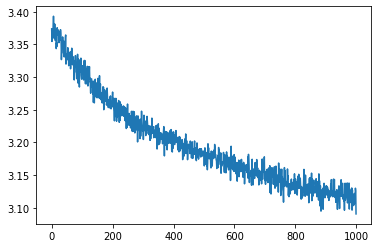

In [94]:
with torch.no_grad():
  plt.plot(range(epochs), losses)

In [95]:
with torch.no_grad():
  y_val = model(cat_test, con_test)
  loss = torch.sqrt(criterion(y_val, y_test))

In [96]:
loss

tensor(3.2774)

In [97]:
for i in range(10):
  diff = np.abs(y_val[i].item() - y_test[i].item())
  print(f'{i}). PREDICTED: {y_val[i].item(): 8.4f}, TRUE: {y_test[i].item(): 8.4f}, DIFF: {diff: 8.4f}')

0). PREDICTED:   4.2274, TRUE:   2.9000, DIFF:   1.3274
1). PREDICTED:  19.3420, TRUE:   5.7000, DIFF:  13.6420
2). PREDICTED:   5.8798, TRUE:   7.7000, DIFF:   1.8202
3). PREDICTED:   8.4065, TRUE:  12.5000, DIFF:   4.0935
4). PREDICTED:   3.9858, TRUE:   4.1000, DIFF:   0.1142
5). PREDICTED:   5.5375, TRUE:   5.3000, DIFF:   0.2375
6). PREDICTED:   3.3839, TRUE:   3.7000, DIFF:   0.3161
7). PREDICTED:  13.1833, TRUE:  14.5000, DIFF:   1.3167
8). PREDICTED:   5.4073, TRUE:   5.7000, DIFF:   0.2927
9). PREDICTED:  10.7984, TRUE:  10.1000, DIFF:   0.6984


In [100]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [101]:
torch.save(model.state_dict(), '/content/gdrive/MyDrive/TaxiModel.pt')

In [6]:
#LOADING MODEL
model2 = TabularModel([(24, 12), (2, 1), (7, 4)], 6, 1, [200, 100], p=0.4)
model2.load_state_dict(torch.load('/content/gdrive/MyDrive/TaxiModel.pt'));
model2.eval()

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [77]:
# with torch.no_grad():
#   y_val = model2(cat_test, con_test)
#   loss = torch.sqrt(criterion(y_val, y_test))
# loss

tensor(2.8375)

In [84]:
# SINGLE DATA PREDICTION 
def test_data(mdl): 
  plat = float(input('What is the pickup latitude? '))
  plong = float(input('What is the pickup longitude? '))
  dlat = float(input('What is the dropoff latitude? '))
  dlong = float(input('What is the dropoff longitude? '))

  psngr = int(input('How many passengers? '))
  dt = input('What is the pickup date and time? (YYYY-MM-DD HH:MM:SS)')

  dfx_dict = {'pickup_latitude':plat,'pickup_longitude':plong,'dropoff_latitude':dlat,
         'dropoff_longitude':dlong,'passenger_count':psngr,'EDTdate':dt}
  dfx = pd.DataFrame(dfx_dict, index=[0])
  dfx['dist_km'] = haversine_distance(dfx,'pickup_latitude', 'pickup_longitude',
                                        'dropoff_latitude', 'dropoff_longitude')
  dfx['EDTdate'] = pd.to_datetime(dfx['EDTdate'])

  dfx['Hour'] = dfx['EDTdate'].dt.hour
  dfx['AMorPM'] = np.where(dfx['Hour']<12,0,1) 
  dfx['Weekday'] = dfx['EDTdate'].dt.strftime("%a")
  dfx['Weekday'] = dfx['Weekday'].replace(['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
                                          [0,1,2,3,4,5,6]).astype('int64')

  cat_cols = ['Hour', 'AMorPM', 'Weekday']
  cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                'dropoff_longitude', 'passenger_count', 'dist_km']
  xcats = np.stack([dfx[col].values for col in cat_cols], 1)
  xcats = torch.tensor(xcats, dtype=torch.int64)
  xconts = np.stack([dfx[col].values for col in cont_cols], 1)
  xconts = torch.tensor(xconts, dtype=torch.float)
  
  # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
  with torch.no_grad():
      z = mdl(xcats, xconts)
  print(f'\nThe predicted fare amount is ${z.item():.2f}')

In [85]:
z = test_data(model2)

What is the pickup latitude? 40.5
What is the pickup longitude? -73.9
What is the dropoff latitude? 40.52
What is the dropoff longitude? -73.92
How many passengers? 2
What is the pickup date and time? (YYYY-MM-DD HH:MM:SS)2010-04-15 16:00:00

The predicted fare amount is $38.59
